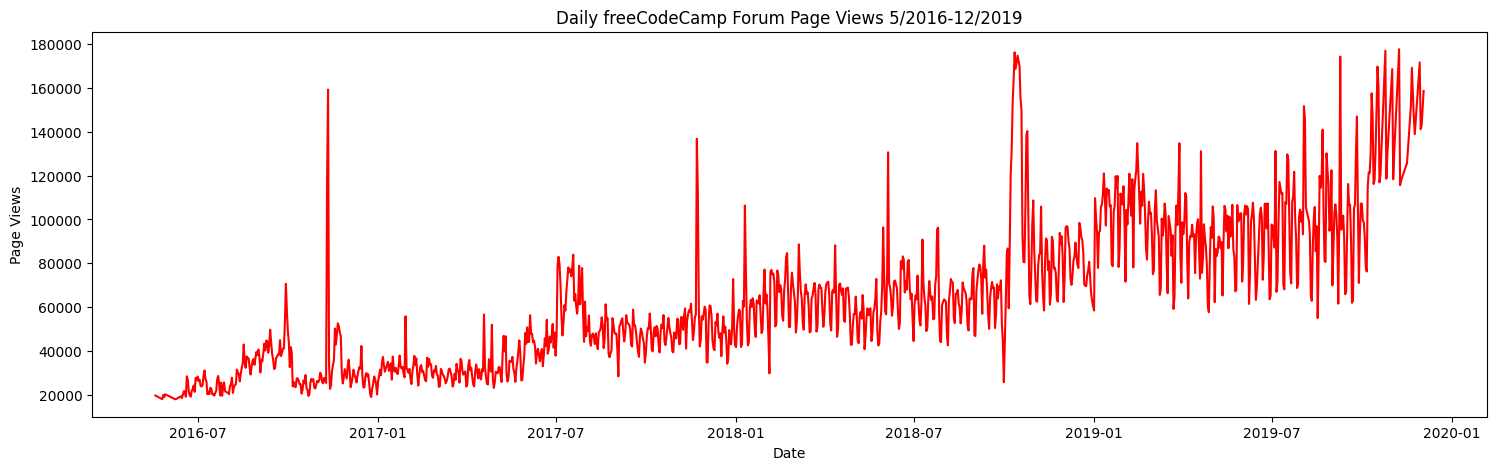

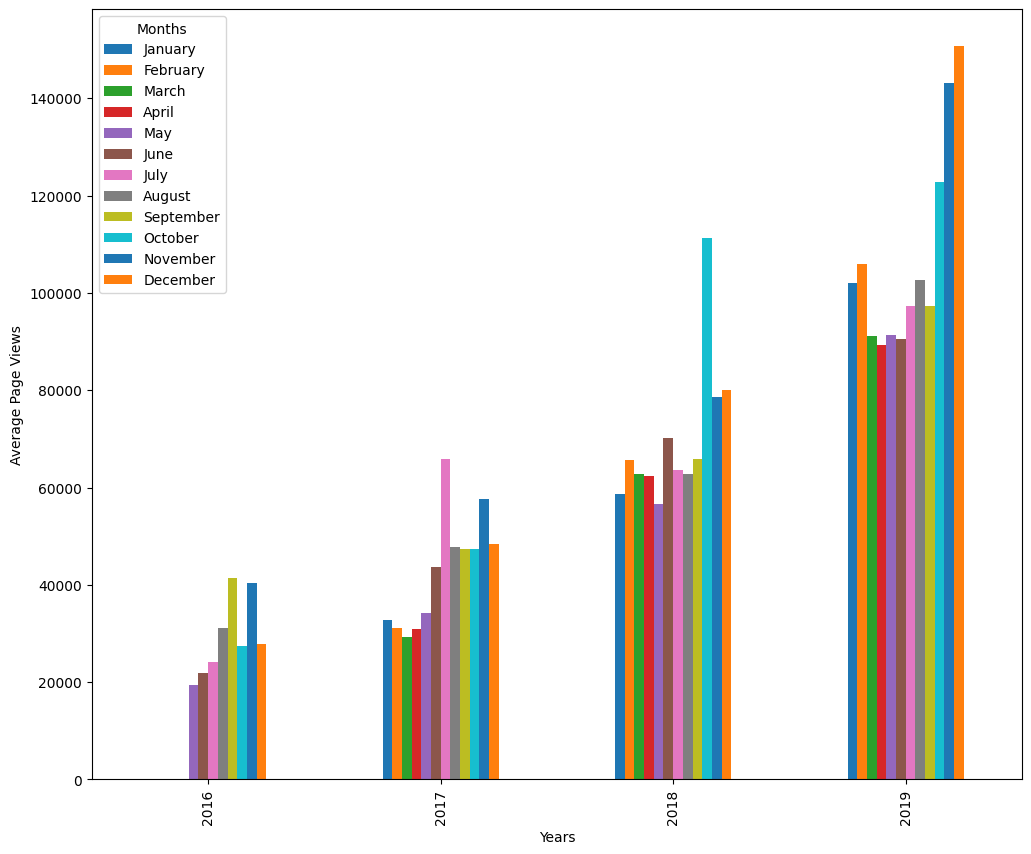

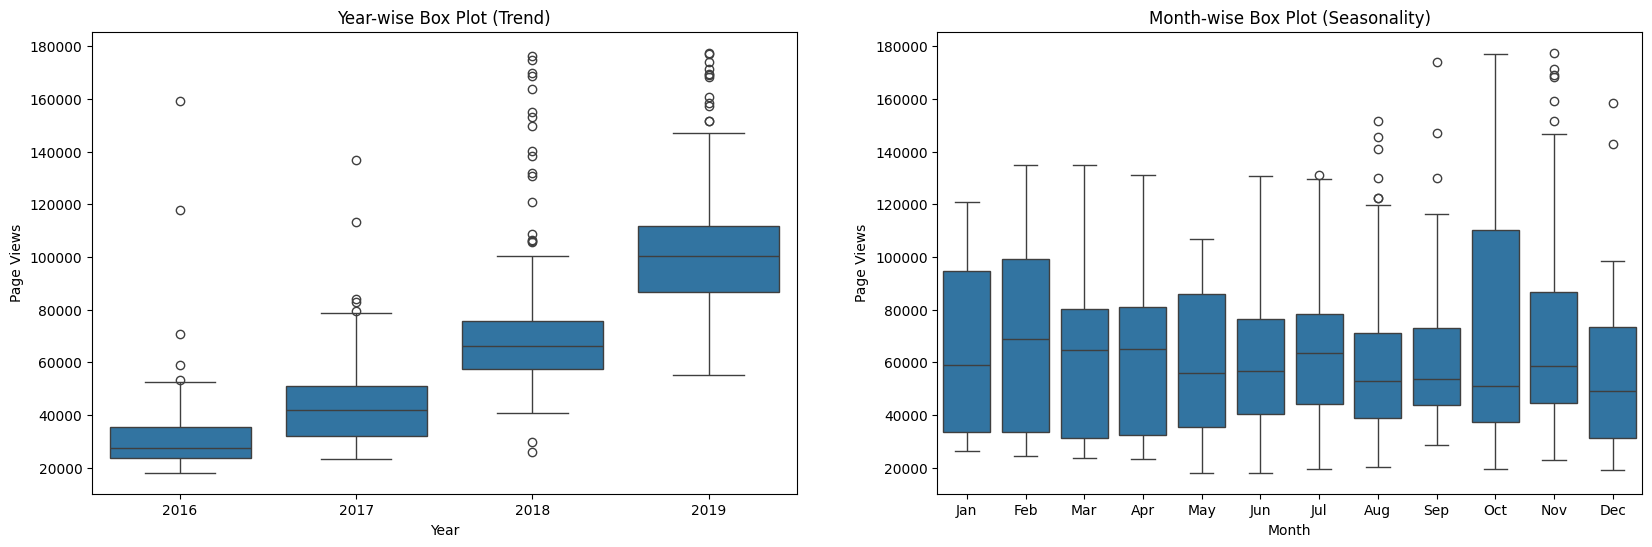

In [1]:
# Importação das bibliotecas necessárias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregando os dados do arquivo CSV.
# Importa os dados e define a coluna 'date' como índice do DataFrame.
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

# 2. Limpeza dos dados:
# Remove os dias em que as visualizações de página estão no top 2,5% ou no bottom 2,5%.
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

# 3. Função para desenhar o gráfico de linhas.
def draw_line_plot():
    """
    Desenha um gráfico de linhas que mostra o número de visualizações de páginas ao longo do tempo.
    """
    # Define o tamanho do gráfico.
    plt.figure(figsize=(18, 5))
    
    # Desenha o gráfico de linhas.
    plt.plot(df.index, df['value'], color='red')
    
    # Configurações dos rótulos e título.
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    
    # Salva o gráfico e retorna a figura.
    plt.savefig('line_plot.png')
    return plt.gcf()

# 4. Função para desenhar o gráfico de barras.
def draw_bar_plot():
    """
    Desenha um gráfico de barras que mostra a média de visualizações de página diárias para cada mês agrupado por ano.
    """
    # Preparação dos dados para o gráfico de barras.
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    # Calcula a média das visualizações de página diárias para cada mês/ano.
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Desenha o gráfico de barras.
    fig = df_bar.plot(kind='bar', figsize=(12, 10), legend=True).figure

    # Configurações dos rótulos e título.
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months', labels=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])

    # Salva o gráfico e retorna a figura.
    plt.savefig('bar_plot.png')
    return fig

# 5. Função para desenhar o gráfico de caixa (box plot).
def draw_box_plot():
    """
    Desenha dois gráficos de caixa lado a lado. O primeiro mostra a variação das visualizações
    ao longo dos anos e o segundo ao longo dos meses.
    """
    # Preparação dos dados para os gráficos de caixa.
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')

    # Ordena os meses corretamente para o gráfico.
    df_box['month'] = pd.Categorical(df_box['month'], categories=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ], ordered=True)

    # Criação dos gráficos de caixa.
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    # Gráfico de caixa por ano.
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Gráfico de caixa por mês.
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Salva o gráfico e retorna a figura.
    plt.savefig('box_plot.png')
    return fig

# Testando as funções e exibindo os gráficos.
# Gráfico de linhas
line_plot = draw_line_plot()
plt.show(line_plot)

# Gráfico de barras
bar_plot = draw_bar_plot()
plt.show(bar_plot)

# Gráfico de caixa
box_plot = draw_box_plot()
plt.show(box_plot)
